<a href="https://colab.research.google.com/github/AbramyantsAnastasia/Labs/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import pandas as pd
import numpy as np
import statsmodels as stm
import scipy
import pandas_datareader
import yfinance
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sbn
import researchpy as rp

In [25]:
df=pd.read_csv("/content/iris.csv")
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  145 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  149 non-null    float64
 3   petal.width   149 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,sepal.length,sepal.width,petal.length,petal.width
count,145.000000,149.000000,149.000000,149.000000
mean,5.827586,3.058389,3.825503,1.185906
std,0.822891,0.437144,1.854584,0.760603
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,10.500000,2.500000


In [26]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [27]:
df.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

In [28]:
df[df.isna().any(axis=1)]

,sepal.length,sepal.width,petal.length,petal.width,variety
2,NaN,3.2,1.3,0.2,Setosa
50,NaN,3.2,4.7,1.4,Versicolor
64,5.6,NaN,3.6,1.3,Versicolor
68,NaN,2.2,4.5,1.5,Versicolor
70,5.9,3.2,4.8,NaN,Versicolor
108,NaN,2.5,5.8,1.8,Virginica
111,6.4,2.7,NaN,1.9,Virginica
139,NaN,3.1,5.4,2.1,Virginica


In [29]:
df.fillna(value=df.mean(),inplace=True)

<ipython-input-29-882009da7771>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(value=df.mean(),inplace=True)


In [31]:
df[df.isna().any(axis=1)]

,sepal.length,sepal.width,petal.length,petal.width,variety


In [32]:
list(df)

['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']

In [33]:
rp.summary_cont(df.select_dtypes(include=float))
df.median()
rp.summary_cat(df['variety'])
rp.summary_cont(df.groupby(df['variety']))

/usr/local/lib/python3.10/dist-packages/researchpy/summary.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():
<ipython-input-33-89c3986ba318>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


sepal.length                                             \
                      N    Mean      SD      SE 95% Conf. Interval   
variety                                                              
Setosa               50  5.0286  0.3682  0.0521    4.9239   5.1332   
Versicolor           50  5.9051  0.4913  0.0695    5.7655   6.0447   
Virginica            50  6.5491  0.6513  0.0921    6.3640   6.7342   

           sepal.width                          ... petal.length          \
                     N    Mean      SD      SE  ...           SD      SE   
variety                                         ...                        
Setosa              50  3.4280  0.3791  0.0536  ...       1.2914  0.1826   
Versicolor          50  2.7732  0.3159  0.0447  ...       0.5127  0.0725   
Virginica           50  2.9740  0.3225  0.0456  ...       0.6536  0.0924   

                              petal.width                                    \
           95% Conf. Interval           N    Mean      SD      SE 95% Conf.   
variety                                                                       
Setosa        1.2870   2.0210          50  0.2460  0.1054  0.0149    0.2160   
Versicolor    4.1343   4.4257          50  1.3137  0.1865  0.0264    1.2607   
Virginica     5.3568   5.7283          50  1.9980  0.3323  0.0470    1.9036   

                     
           Interval  
variety              
Setosa       0.2760  
Versicolor   1.3667  
Virginica    2.0924  

[3 rows x 24 columns]

In [34]:
import scipy.stats as stats
x=df.select_dtypes(include=float)
names=list(x.columns)
trim=[]
for i in x.columns:
  trim.append(stats.trim_mean(x[i],0.1))

In [35]:
trim_means=pd.DataFrame(data=trim,index=names,columns=['Trimmed mean'])
print(trim_means)

              Trimmed mean
sepal.length      5.788649
sepal.width       3.044653
petal.length      3.796879
petal.width       1.167383


In [36]:
Q1 = np.percentile(df['sepal.width'], 25)
Q3 = np.percentile(df['sepal.width'], 75)
IQR = Q3 - Q1 #межквартильное расстояние
df[(df['sepal.width'] < Q1-1.5*IQR) | (df['sepal.width'] > Q3 + 1.5*IQR)] #метод Д.Тьюки для определения выбросов

,sepal.length,sepal.width,petal.length,petal.width,variety
15,5.7,4.4,2.1,0.4,Setosa
32,5.2,4.1,1.5,0.1,Setosa
33,5.5,4.2,1.4,0.2,Setosa
60,5.0,2.0,3.5,1.0,Versicolor


In [37]:
import numpy as np
from collections import Counter
def list_outliers(df, n, features):
 outlier_indices = []
 for i in features:
  Q1 = np.percentile(df[i], 25)
  Q3 = np.percentile(df[i], 75)
  IQR = Q3 - Q1
  outlier_list_col = df[(df[i] < Q1 - 1.5*IQR) | (df[i] > Q3 + 1.5*IQR)].index
  outlier_indices.extend(outlier_list_col)
 outlier_indices = Counter(outlier_indices)
 multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
 return multiple_outliers

In [38]:
outliers=list_outliers(x,0,names)
print(outliers)

[15, 32, 33, 60, 39]


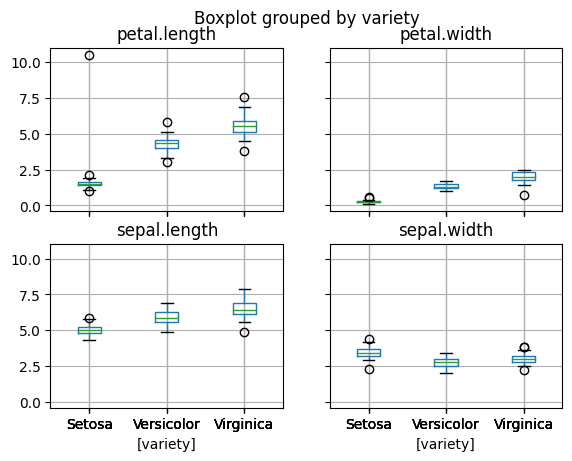

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
boxplot = df.boxplot(by='variety')
plt.show()


<ipython-input-74-bcef377e050a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(df['sepal.length'])


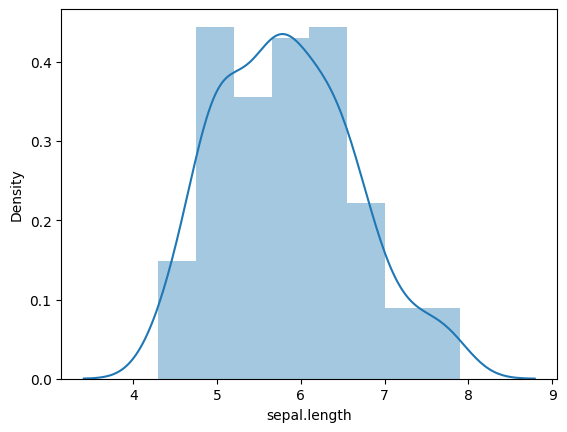

In [ ]:
sbn.distplot(df['sepal.length'])
plt.show()

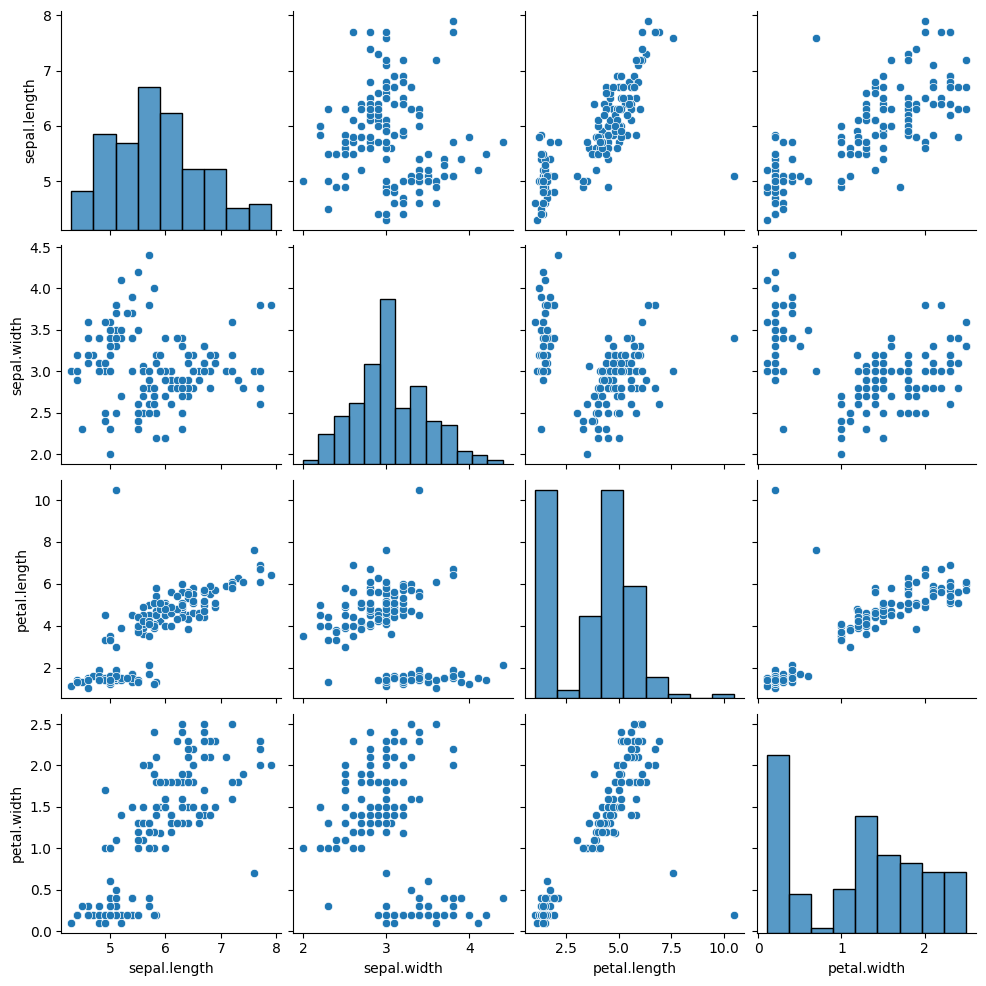

In [ ]:
sbn.pairplot(df)
plt.show()

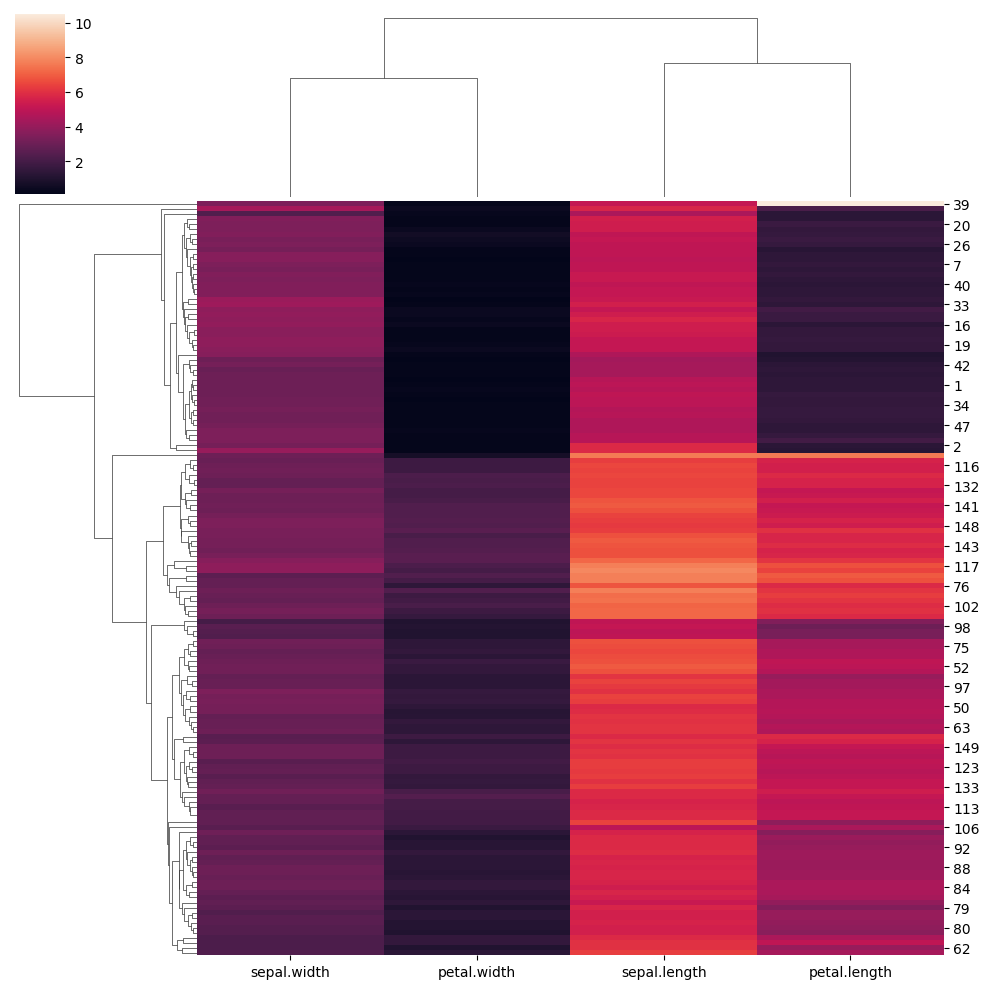

In [ ]:
sbn.clustermap(df.select_dtypes(include=float))
plt.show()

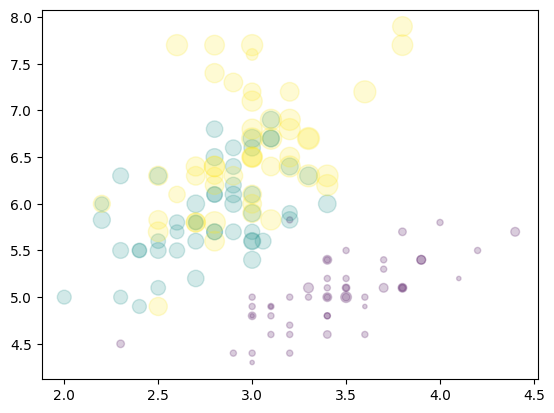

In [ ]:
target = pd.factorize(df.variety)[0]
plt.scatter(df['sepal.width'], df['sepal.length'], alpha=0.2, s=100*df['petal.width'], c=target, cmap='viridis')
plt.show()


<ipython-input-85-10a713a279c0>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(x=df['sepal.width'], y=df['sepal.length'], cmap="seismic", cbar=True, shade=True, thresh=0)


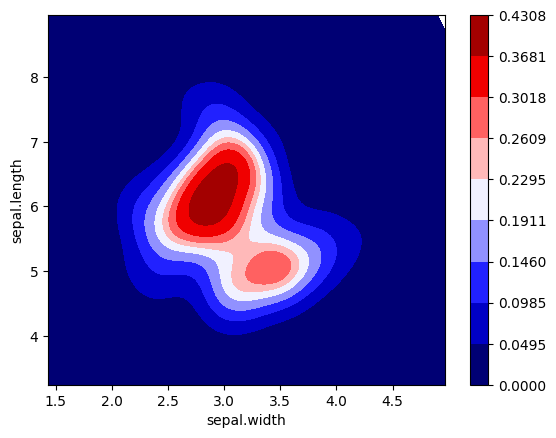

In [ ]:
sbn.kdeplot(x=df['sepal.width'], y=df['sepal.length'], cmap="seismic", cbar=True, shade=True, thresh=0)
plt.show()

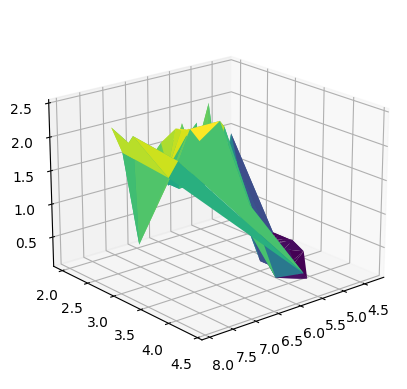

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_trisurf(df['sepal.length'], df['sepal.width'], df['petal.width'], cmap=plt.cm.viridis)
ax.view_init(20, 50) #повернуть график
plt.show()

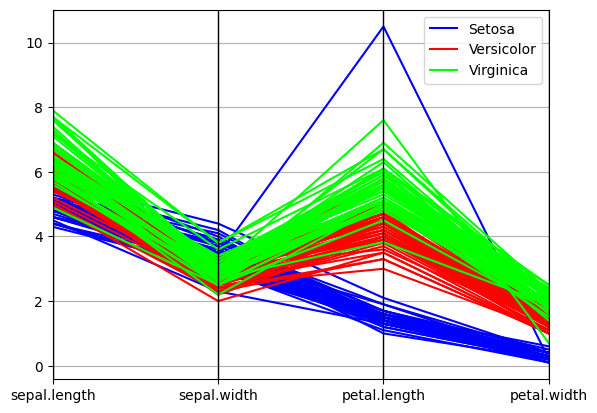

In [ ]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(df, 'variety', colormap=plt.get_cmap("brg"))
plt.show()
